### Programa de Estudios Superiores 2019-2020
### Programación I - proyecto final
#### Elaborado por <span class="alert alert-info"> ***Helen Saraí Avila Cabrera*** </span><br>
***
***Instrucciones generales:*** resuelve el siguiente problema de acuerdo a la especificación dada. 
- El código debe ir comentado para explicar la lógica y debe ser totalmente funcional para ser considerado correcto. De lo contrario, la calificación podrá ser subjetiva.
- Al final de la definición de la clase, obtenga una instancia y muestra que el objeto se comporta de acuerdo a las especificaciones deseadas, para poder calificarte más rápidamente.
***

# Lanzamiento de dardos

Un catedrático de matemáticas dibuja en el pizarrón las funciones $f(x)=1-x^2$ y $g(x)=1-x$ para $0 \leq x \leq 1$. Al terminar de dibujar, se da cuenta que uno de sus alumnos está completamente dormido, así que decide despertarlo y pedirle que calcule el área entre curvas. El alumno, que se aburre en la clase de matemáticas, pero no en la de estadística y programación, le dice que es capaz de estimar el área sin necesidad de lo que ha enseñado mientras dormía. El catedrático le pide que lo demuestre en un cuaderno de *Jupyter*, pero que, además de calcular el área, desea que el programa cuente con otros requisitos.

<div class="alert alert-info">
<b>Instrucciones</b>: <br>

A continuación se le presenta el formato de la respuesta del estudiante. Usted debe completar el código y probar cada uno de los métodos en las casillas indicadas. 

</div>

<div class="alert alert-danger">
<b>Ojo</b>: <br>

 La gráfica debe contar con un sombreado entre ambas curvas, así como una leyeda indicando cada una de las funciones. Se adjunta un ejemplo. 

</div>

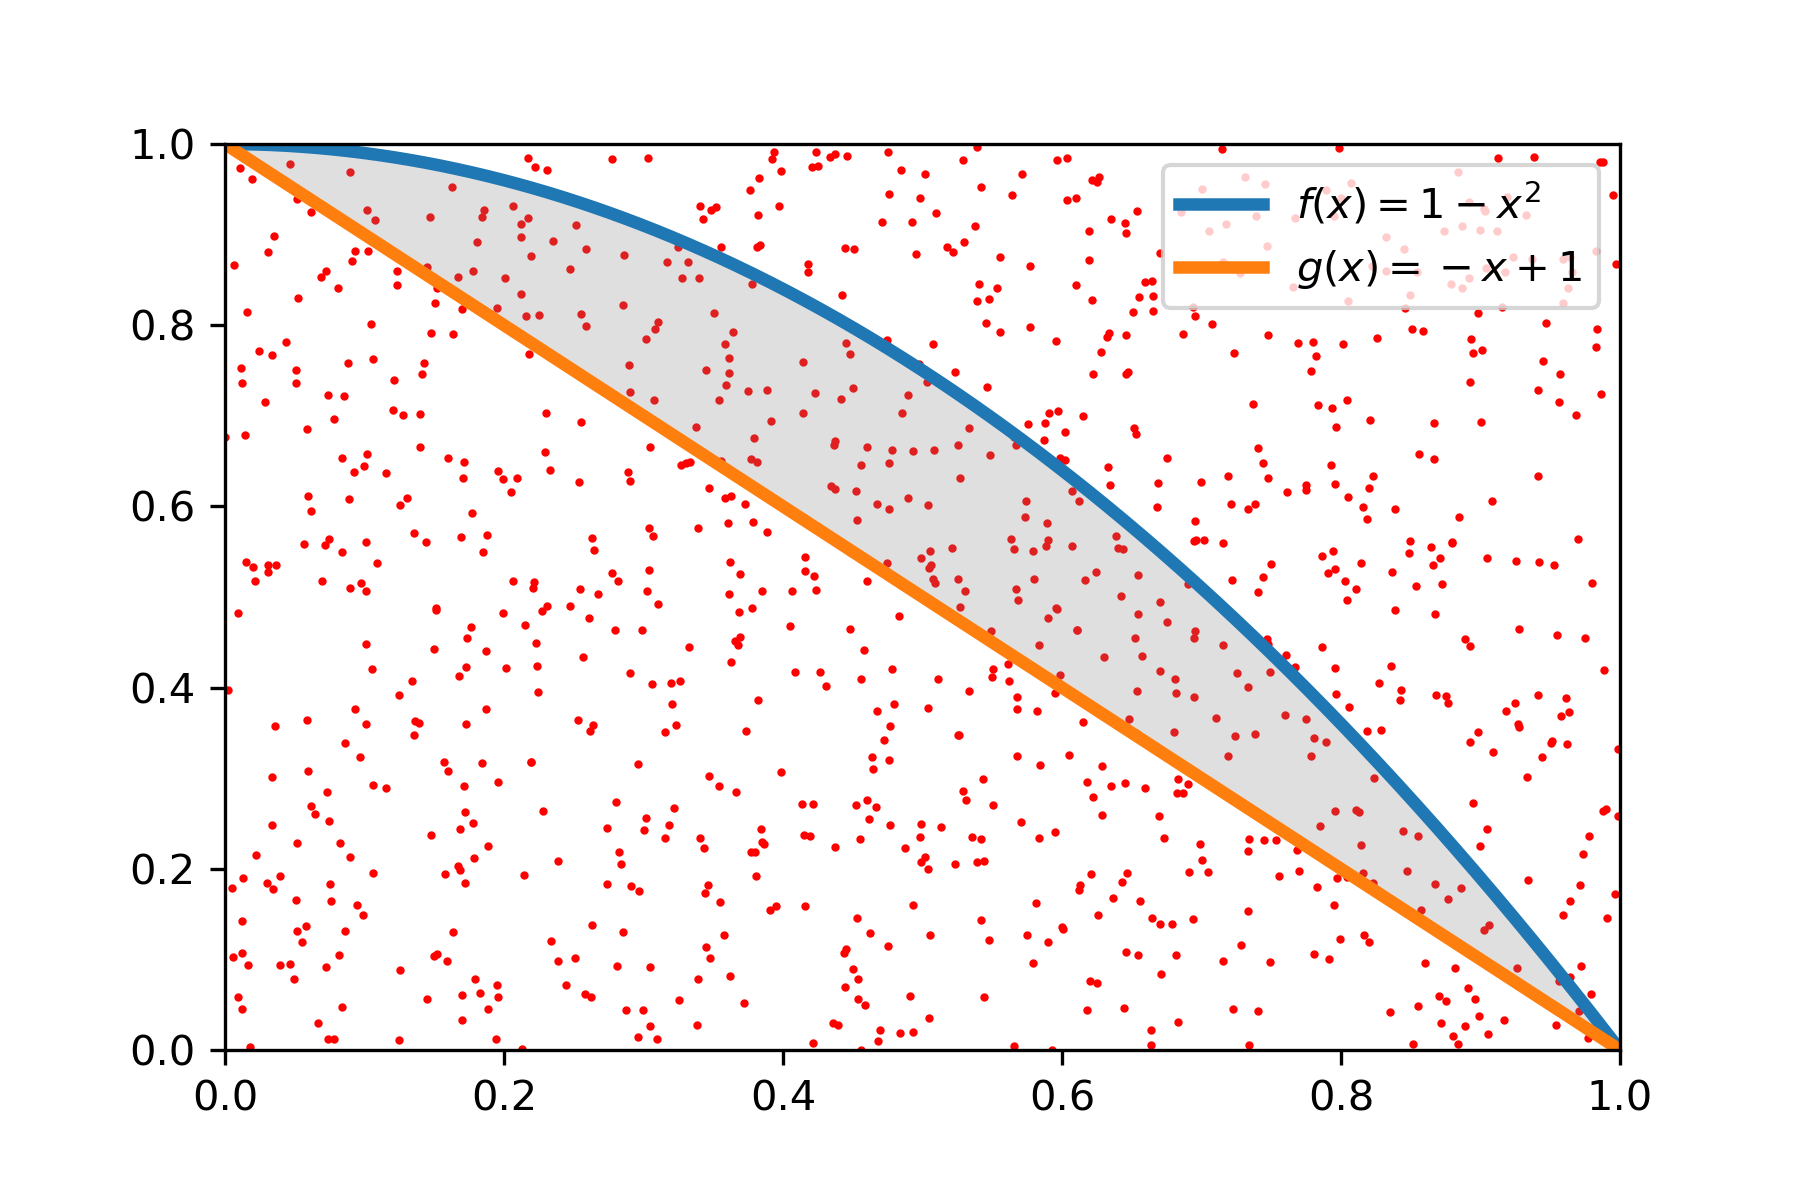

<div class="alert alert-info">
<b>Importe los paquetes que sean necesarios</b>: <br>


</div>

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

<div class="alert alert-info">
<b>Escriba su código en la celda siguiente</b>: <br>


</div>

In [18]:
class AreaMonteCarlo(object):
    # %% ------------------------------------------------------------------------------------------------------
    """ En esta sección debe definir correctamente el método constructor. """
    def __init__(self,superior,inferior,infizq,supder):
        self.superior = superior # Función correspondiente al límite superior del área sombreada.
        self.inferior = inferior # Función correspondiente al límite superior del área sombreada.
        self.infizq = infizq # Coordenadas correspondientes a la esquina inferior izquierda del rectángulo.
        self.supder = supder # Coordenadas correspondientes a la esquina superior derecha del rectángulo.
        self.dardos = None # Al inicio corresponde a un NoneType
        self.n = None # Número de dardos lanzados. Al inicio es NoneType.
    
    # %% ------------------------------------------------------------------------------------------------------
    """ En esta sección debe definir un método que permita generar una matriz 
    de n filas y 2 columnas, rellena completamente de números aleatorios 
    uniformemente distribuidos. Dicha matrix debe ser almacenada el atributo 'dardos'"""
    
    def lanzarDardos(self,n):
        self.dardos = np.random.random((self.n, 2))
        return self.dardos
    
    # %% ------------------------------------------------------------------------------------------------------
    """ En esta sección debe definir un método que grafique algo similar al ejemplo. 
    El método debe poder graficar aún cuando el atributo "dardo" esté vacío.
    Debe graficar en un rectágulo que tenga las esquinas 'infizq' y 'supder'
    como límites. Se debe poder elegir guardar o no la gráfica de 
    alta calidad con nombre 'mc.png'. La cantidad de filas 'n' se debe
    guardar en el atributo con mismo nombre. """
    
    def graficar(self, guardar=False):
        
        x = np.linspace(0, 1) #Se define x como el intervalo de 0 a 1. 
        f = self.superior #Se define la función f(x)
        g = self.inferior #Se define la función g(x)

        X = self.dardos[0:n, 0]
        Y = self.dardos[0:n, 1]


        plt.scatter(X,Y) #Simulando las coordenadas de los dardos. 
        plt.plot(x, f, 'blue', linewidth=2.0) #Gráfica de f(x)
        plt.plot(x, g, 'orange',linewidth=2.0) #Gráfica de g(x)

        #Se grafican los limites los cuales funcionan como el rectangulo. 
        plt.xlim(0.0, 1.0)
        plt.ylim(0.0, 1.0)

        plt.title(r"Area dentro de la curva") #Se coloca titulo a la gráfica.
        
        pregunta = input("¿Desea guardar la gráfica? (si o no): ")
        if pregunta == 'si':
            plt.savefig("mc.png", format='png', dpi=72)
            plt.show()
        else:
             plt.show()
    
    # %% ------------------------------------------------------------------------------------------------------
    
    def calcularArea(self):
        
        adentro=0 #Se nombra un contador como adentro para contar cuales de los "dardos" se encuentran dentro del area.
        for i in range (self.n): #Se crea un loop para que recorra todas las filas de la matriz de "dardos".
            coordenada = self.dardos[i, :2] #Por cada fila de la matriz nos interesa formar una dupla que funcione como coordenada. 
            X = coordenada[0] #Se nombra el valor de X
            Y = coordenada[1] #Se nombra el valor de Y
            lim_inf = (1-X) #Se evalua el valor de X en la función que funciona como límite inferior.
            lim_sup = 1-(X**2) #Se evalua el valor de X en la función que funciona como límite inferior.
            if Y >= lim_inf: #Si el valor de Y de la coordenada es mayor o igual a el valor de X evaluado en el lim inferior,puede estar adentro. 
                if Y <= lim_sup: #Si el valor de Y de la coordenada es menor o igual a el valor de X evaluado en el lim inferior, estará adentro.
                    adentro +=1            

        area = (1**2) * (adentro/n) #Se calcula el area por el metodo de montecarlo. 
        
        print ("El area entre curvas es igual a: ",area)
    
    # %% ------------------------------------------------------------------------------------------------------
    """ En esta sección, escriba un método que devuelva un DataFrame con las
    siguientes columnas:
        - Coordenada en x del dardo
        - Coordenada en y del dardo
        - 1 si está dentro del área y 0 si no lo está. 
        
        Se debe poder elegir guardar un archivo mc.csv con los resultados."""
    def dardosResultados(self, guardar=False):
        for i in range (self.n):
            coordenada = self.dardos[i, :2]
            X = coordenada[0]
            Y = coordenada[1]
            lim_inf = (1-X)
            lim_sup = 1-(X**2)
            if Y >= lim_inf:
                if Y <= lim_sup:
                    adentro = 1
                else:
                    adentro = 0

            adentro_sino = adentro #Se crea una lista que nos diga si esta o no dentro del area. 

        X =  pd.Series(self.dardos[0:n, 0])
        Y =  pd.Series(self.dardos[0:n, 1])
        Z =  pd.Series(adentro_sino)
        df = pd.DataFrame({ 'x': X, 'y': Y, 'Adentro o no:': adentro_sino })
        print(df)

***
## Área de pruebas personal

Utilice el siguiente espacio para llevar a cabo **sus** pruebas.


In [99]:
n=200
dardos = np.random.random((n, 2))

¿Desea guardar la gráfica? (si o no): no


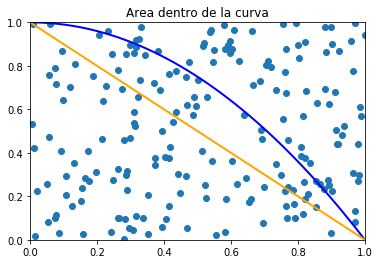

In [94]:
n=200
dardos = np.random.random((n, 2))
superior = 1-(x**2) # Función correspondiente al límite superior del área sombreada.
inferior = (1-x) # Función correspondiente al límite superior del área sombreada.
infizq = (0.0,1.0) # Coordenadas correspondientes a la esquina inferior izquierda del rectángulo.
supder = (1.0,1.0) # Coordenadas correspondientes a la esquina superior derecha del rectángulo.

x = np.linspace(0, 1) #Se define x como el intervalo de 0 a 1. 
f = superior #Se define la función f(x)
g = inferior #Se define la función g(x)

X = dardos[0:n, 0]
Y = dardos[0:n, 1]


plt.scatter(X,Y) #Simulando las coordenadas de los dardos. 
plt.plot(x, f, 'blue', linewidth=2.0) #Gráfica de f(x)
plt.plot(x, g, 'orange',linewidth=2.0) #Gráfica de g(x)

#Se grafican los limites los cuales funcionan como el rectangulo. 
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)

plt.title(r"Area dentro de la curva")

#Se configura guardar o no la gráfica.
pregunta = input("¿Desea guardar la gráfica? (si o no): ")
if pregunta == 'si':
    plt.savefig("mc.png", format='png', dpi=72)
    plt.show()
else:
     plt.show()

In [124]:
x = np.linspace(0, 1)
superior = 1-(x**2) # Función correspondiente al límite superior del área sombreada.
inferior = (1-x) # Función correspondiente al límite superior del área sombreada.

inferior[2]

0.9591836734693877

In [174]:
n=2000
dardos = np.random.random((n, 2))

adentro=0
for i in range (n):
    coordenada = dardos[i, :2]
    X = coordenada[0]
    Y = coordenada[1]
    lim_inf = (1-X)
    lim_sup = 1-(X**2)
    if Y >= lim_inf:
        if Y <= lim_sup:
            adentro +=1            

area = (1**2) * (adentro/n)
area

0.168

In [ ]:
En esta sección, escriba un método que devuelva un DataFrame con las
    siguientes columnas:
        - Coordenada en x del dardo
        - Coordenada en y del dardo
        - 1 si está dentro del área y 0 si no lo está. 
        
        Se debe poder elegir guardar un archivo mc.csv con los resultados."""

In [188]:

for i in range (n):
    coordenada = dardos[i, :2]
    X = coordenada[0]
    Y = coordenada[1]
    lim_inf = (1-X)
    lim_sup = 1-(X**2)
    if Y >= lim_inf:
        if Y <= lim_sup:
            adentro = 1
        else:
            adentro = 0
    adentro_sino =(adentro)     
      

0
0
0
1
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
1
1
1
1
0
0
0
1
1
1
1
0
0
0
0
0
0
0
1
0
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
0
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
1
1
1
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
1
1
0
1
1
1
1
0
0
0
0
1
0
0
0
0
0
1
1
1
1
0
1
0


In [190]:
n=2000
dardos = np.random.random((n, 2))

for i in range (n):
    coordenada = dardos[i, :2]
    X = coordenada[0]
    Y = coordenada[1]
    lim_inf = (1-X)
    lim_sup = 1-(X**2)
    if Y >= lim_inf:
        if Y <= lim_sup:
            adentro = 1
        else:
            adentro = 0
    
    adentro_sino = adentro

X =  pd.Series(dardos[0:n, 0])
Y =  pd.Series(dardos[0:n, 1])
Z =  pd.Series(adentro_sino)
df = pd.DataFrame({ 'x': X, 'y': Y, 'Adentro o no:': adentro_sino })
df

,x,y,Adentro o no:
0,0.831084,0.771842,0
1,0.170365,0.789774,0
2,0.002239,0.061741,0
3,0.483621,0.717386,0
4,0.200711,0.471472,0
...,...,...,...
1995,0.538754,0.707076,0
1996,0.757084,0.829081,0
1997,0.457059,0.860339,0
1998,0.900533,0.347055,0


***
## Área de pruebas para calificación

Utilice el siguiente espacio para mostrarnos su implementación terminada.

<div class="alert alert-info">
<b>Pruebe el método "lanzarDardos"</b>: <br>
</div>

In [19]:
A1 = AreaMonteCarlo(('1-x**2'),('1-x'),(0,0),(1,1))
A1.lanzarDardos(100)

TypeError: 'NoneType' object cannot be interpreted as an integer

<div class="alert alert-info">
<b>Pruebe el método "graficar"</b>: <br>
</div>

<div class="alert alert-info">
<b>Pruebe el método "calcularArea"</b>: <br>
</div>

<div class="alert alert-info">
<b>Pruebe el método "dardosResultados"</b>: <br>
</div>

<div class="alert alert-info">
<b>Muestre cada uno de los atribujos del objeto utilizado en el ejemplo</b>: <br>
</div>